In [222]:
import pandas as pd
import numpy as np
import statsmodels.api as sm
import statsmodels.formula.api as smf


import matplotlib.pyplot as plt
import matplotlib as mpl
import seaborn as sns

#한글 사용
from matplotlib import rc  
rc('font', family='AppleGothic') 			
plt.rcParams['axes.unicode_minus'] = False  


data0 = pd.read_csv('서울특별시_행정동별 자동차 등록대수 현황_20220430.csv', encoding='cp949')
data1 = pd.read_csv('데이터찐최종.csv')

data1.head(10000)

,행정구역코드,시도명,시군구명,읍면동명,혼잡시간강도,혼잡빈도강도,전체추정교통량,등록차수,교통량,승용차 추정교통량,버스 추정교통량,화물차 추정교통량,주차장혼잡평균
0,1101053,서울특별시,종로구,사직동,95.12,90.43,18445,8170,2.257650,15038,100,3307,4.411215
1,1101054,서울특별시,종로구,삼청동,53.03,32.45,9841,777,12.665380,8195,39,1607,44.736760
2,1101055,서울특별시,종로구,부암동,74.40,60.51,17090,3140,5.442675,13951,107,3032,42.711838
3,1101056,서울특별시,종로구,평창동,59.39,45.55,13694,6609,2.072023,11105,86,2503,19.598131
4,1101057,서울특별시,종로구,무악동,67.78,36.04,25492,2796,9.117310,20986,142,4364,76.590343
...,...,...,...,...,...,...,...,...,...,...,...,...,...
417,1125070,서울특별시,강동구,둔촌1동,48.73,21.40,36721,545,67.377982,28898,289,7534,84.754673
418,1125071,서울특별시,강동구,둔촌2동,54.40,28.98,13926,7998,1.741185,10434,66,3426,8.111371
419,1125072,서울특별시,강동구,암사1동,68.03,39.04,10201,10427,0.978326,7442,32,2727,5.989097
420,1125073,서울특별시,강동구,천호2동,59.84,42.78,21284,9412,2.261368,16095,254,4935,14.933022


In [218]:
data0.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3570 entries, 0 to 3569
Data columns (total 16 columns):
 #   Column     Non-Null Count  Dtype  
---  ------     --------------  -----  
 0   사용본거지 시군구  3570 non-null   object 
 1   읍면동 (행정동)  3570 non-null   object 
 2   연료         3570 non-null   object 
 3   계          3506 non-null   float64
 4   관용_승용      3570 non-null   int64  
 5   관용_승합      3570 non-null   int64  
 6   관용_화물      3570 non-null   int64  
 7   관용_특수      3570 non-null   int64  
 8   자가용_승용     3570 non-null   int64  
 9   자가용승합      3570 non-null   int64  
 10  자가용화물      3570 non-null   int64  
 11  자가용특수      3570 non-null   int64  
 12  영업용_승용     3570 non-null   int64  
 13  영업용승합      3570 non-null   int64  
 14  영업용화물      3570 non-null   int64  
 15  영업용특수      3570 non-null   int64  
dtypes: float64(1), int64(12), object(3)
memory usage: 446.4+ KB


In [244]:
## 선형회귀분석
## 종속변수 : 전체 추정교통량
## 독립변수 : '혼잡시간강도', '혼잡빈도강도', '교통량'

# 독립 변수
independent_vars = ['혼잡빈도강도', '교통량', '주차장혼잡평균']

# 종속 변수
dependent_var = '혼잡시간강도'

# 상수항(Intercept)을 추가
X = sm.add_constant(data1[independent_vars])

# 선형 회귀 모델 생성
model = sm.OLS(data1[dependent_var], X)

# 모델 피팅
results = model.fit()

# 회귀 분석 결과 출력
results.summary()


<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                 혼잡시간강도   R-squared:                       0.881
Model:                            OLS   Adj. R-squared:                  0.880
Method:                 Least Squares   F-statistic:                     1034.
Date:                Sun, 03 Dec 2023   Prob (F-statistic):          6.13e-193
Time:                        23:32:41   Log-Likelihood:                -1246.1
No. Observations:                 422   AIC:                             2500.
Df Residuals:                     418   BIC:                             2516.
Df Model:                           3                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const         35.8165      0.747     47.975      0.000      34.349      37.284
혼잡빈도강도         0.6771      0.012     55.285      0.000       0.653       0.701
교통량           -0.0385      0.057     -0.676      0.499      -0.150       0.073
주차장혼잡평균        0.0120      0.007      1.785      0.075      -0.001       0.025
==============================================================================
Omnibus:                       22.810   Durbin-Watson:                   1.894
Prob(Omnibus):                  0.000   Jarque-Bera (JB):               29.096
Skew:                          -0.467   Prob(JB):                     4.81e-07
Kurtosis:                       3.884   Cond. No.                         237.
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

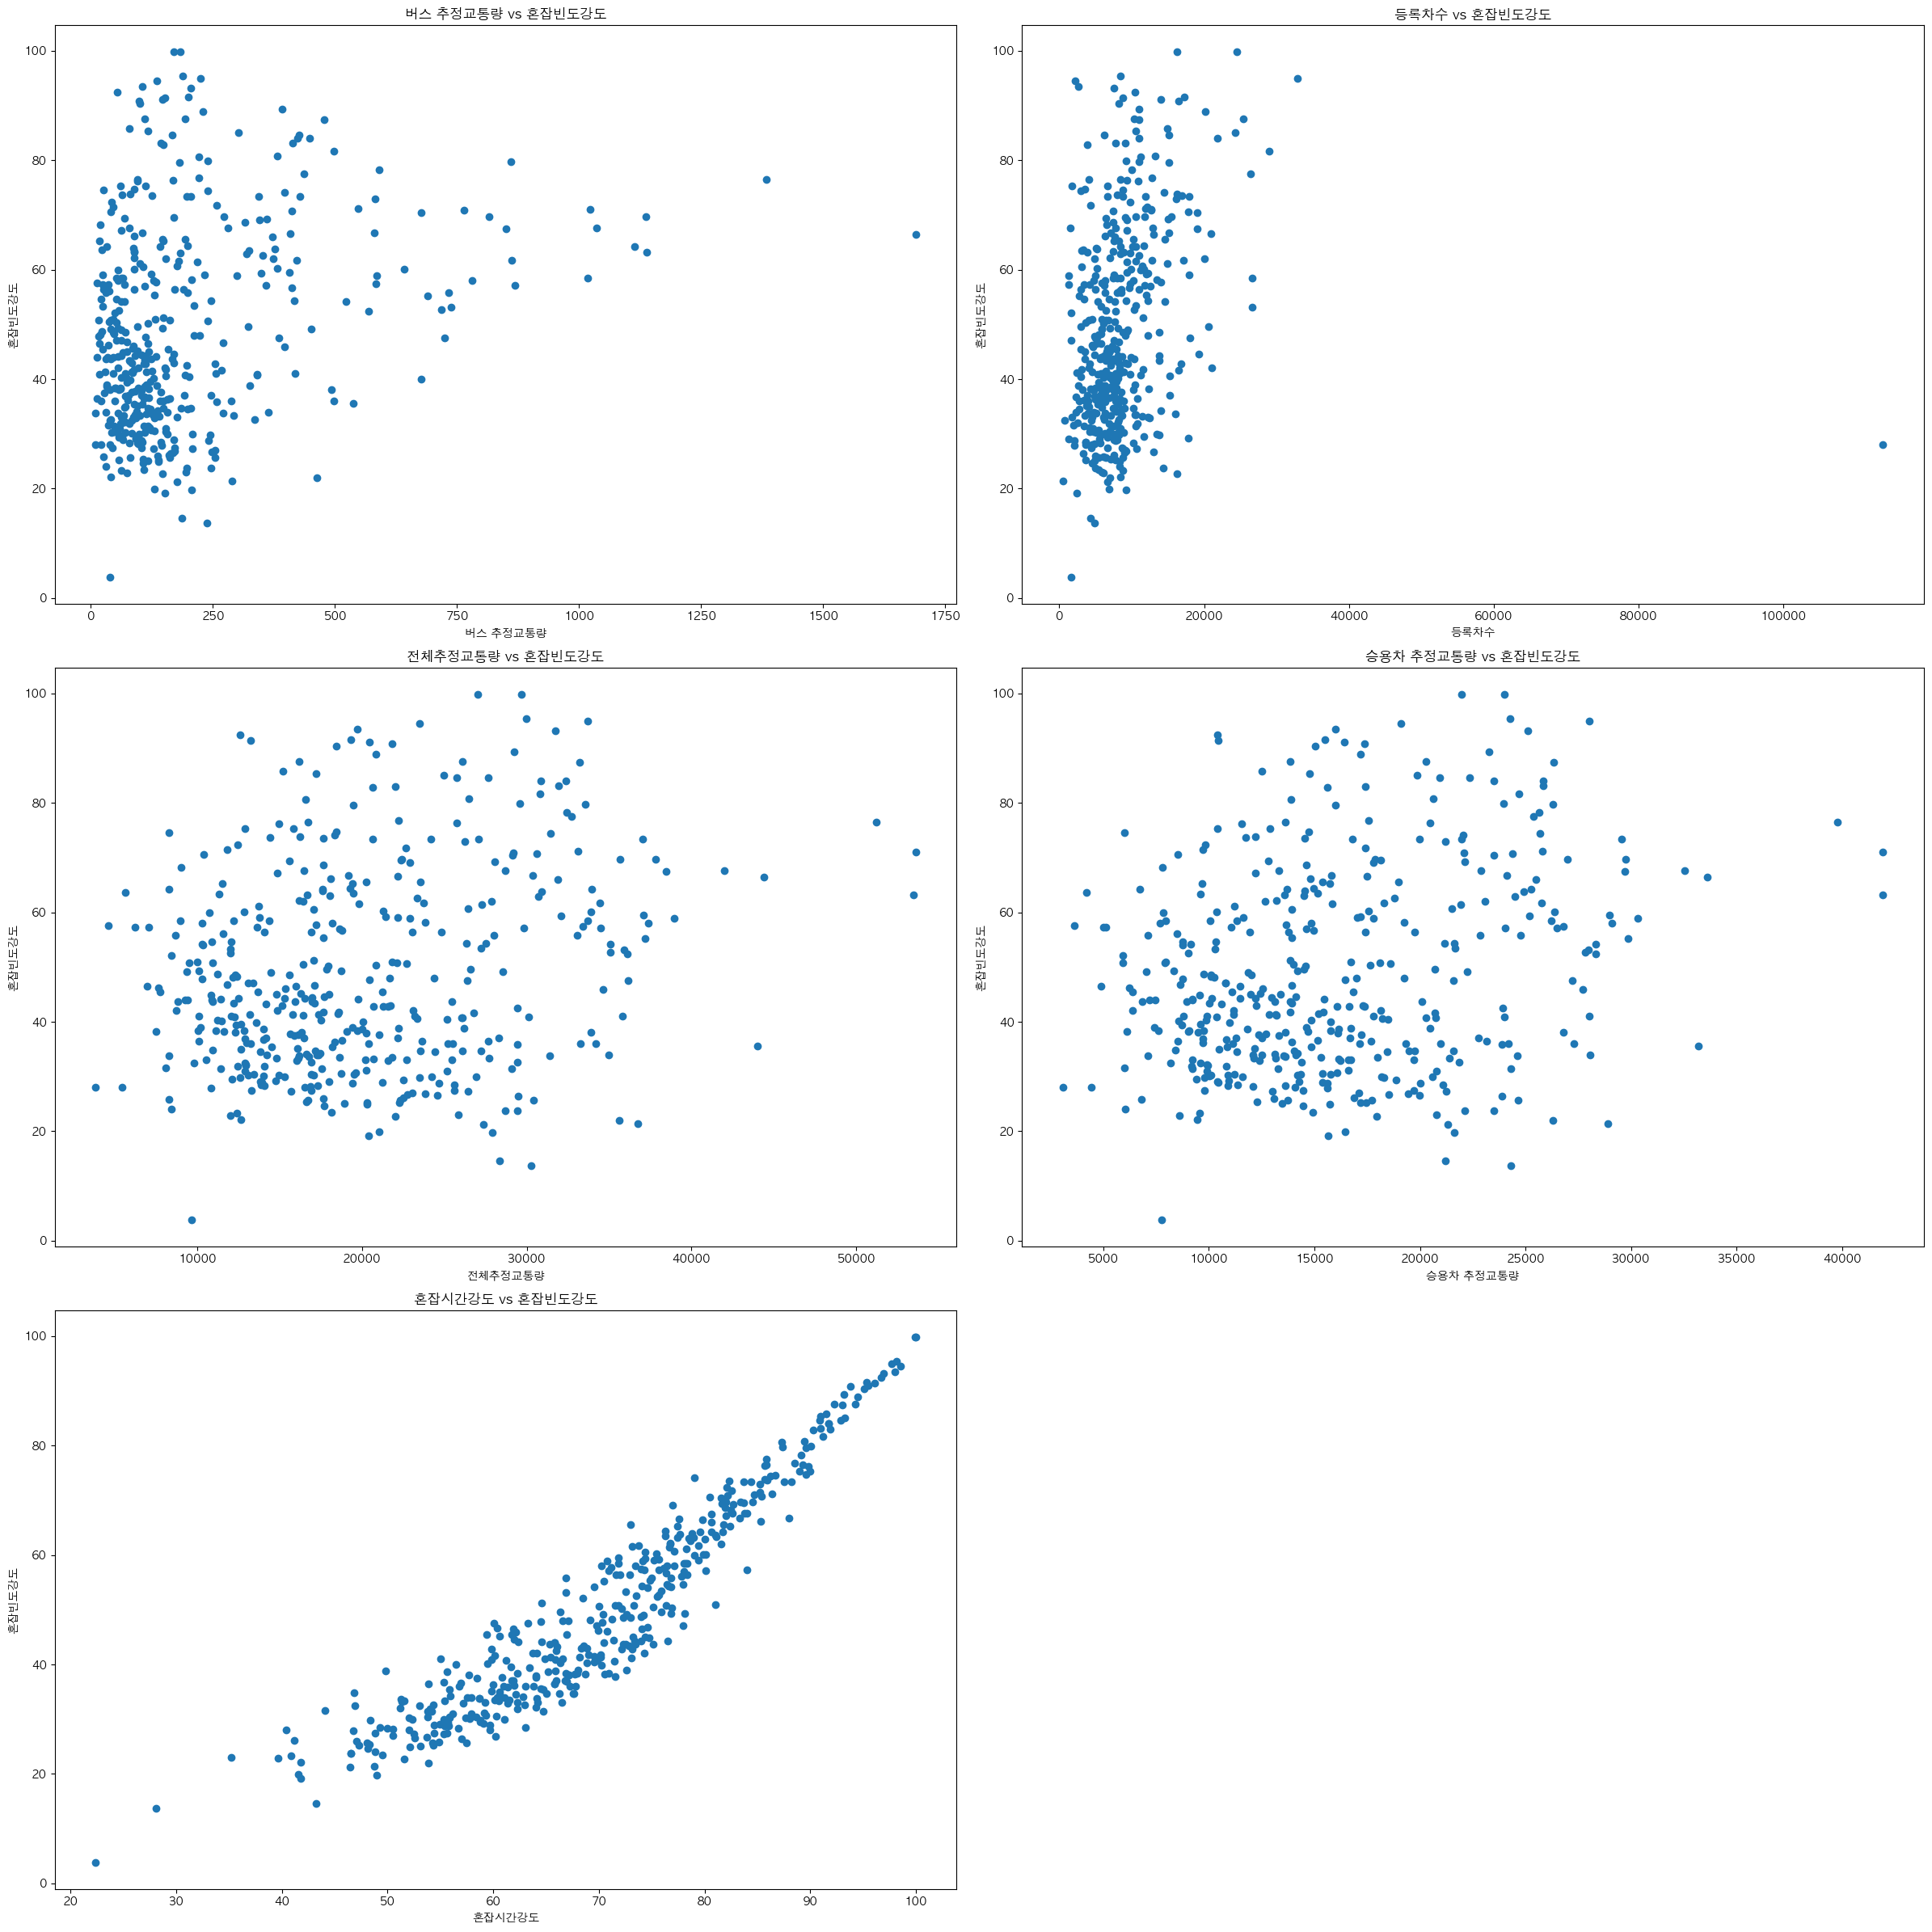

In [251]:
import matplotlib.pyplot as plt
from matplotlib import font_manager, rc

# 그래프에서 한글 표기를 위한 글꼴 경로 설정
font_path = "/System/Library/Fonts/Supplemental/AppleGothic.ttf"  # 맥 사용자의 경우
font_name = font_manager.FontProperties(fname=font_path).get_name()
rc('font', family=font_name)

# 산점도 그리기
plt.figure(figsize=(24, 24))

# 혼잡시간강도
plt.subplot(3, 2, 5)
plt.scatter(data1['혼잡시간강도'], data1['혼잡빈도강도'])
plt.title('혼잡시간강도 vs 혼잡빈도강도')
plt.xlabel('혼잡시간강도')
plt.ylabel('혼잡빈도강도')

# 전체추정교통량
plt.subplot(3, 2, 3)
plt.scatter(data1['전체추정교통량'], data1['혼잡빈도강도'])
plt.title('전체추정교통량 vs 혼잡빈도강도')
plt.xlabel('전체추정교통량')
plt.ylabel('혼잡빈도강도')

# 등록차수
plt.subplot(3, 2, 2)
plt.scatter(data1['등록차수'], data1['혼잡빈도강도'])
plt.title('등록차수 vs 혼잡빈도강도')
plt.xlabel('등록차수')
plt.ylabel('혼잡빈도강도')

# 승용차 추정교통량
plt.subplot(3, 2, 4)
plt.scatter(data1['승용차 추정교통량'], data1['혼잡빈도강도'])
plt.title('승용차 추정교통량 vs 혼잡빈도강도')
plt.xlabel('승용차 추정교통량')
plt.ylabel('혼잡빈도강도')

# 버스 추정교통량
plt.subplot(3, 2, 1)
plt.scatter(data1['버스 추정교통량'], data1['혼잡빈도강도'])
plt.title('버스 추정교통량 vs 혼잡빈도강도')
plt.xlabel('버스 추정교통량')
plt.ylabel('혼잡빈도강도')

plt.tight_layout()
plt.show()


/var/folders/8y/73p4ddkd00q5pl7h691yh7s80000gn/T/ipykernel_21914/1341434095.py:4: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  sb.heatmap(data1.corr(),
/Users/joseohyeon/anaconda3/lib/python3.10/site-packages/seaborn/utils.py:80: UserWarning: Glyph 8722 (\N{MINUS SIGN}) missing from current font.
  fig.canvas.draw()


<Axes: >

/Users/joseohyeon/anaconda3/lib/python3.10/site-packages/IPython/core/events.py:89: UserWarning: Glyph 8722 (\N{MINUS SIGN}) missing from current font.
  func(*args, **kwargs)
/Users/joseohyeon/anaconda3/lib/python3.10/site-packages/IPython/core/pylabtools.py:152: UserWarning: Glyph 8722 (\N{MINUS SIGN}) missing from current font.
  fig.canvas.print_figure(bytes_io, **kw)


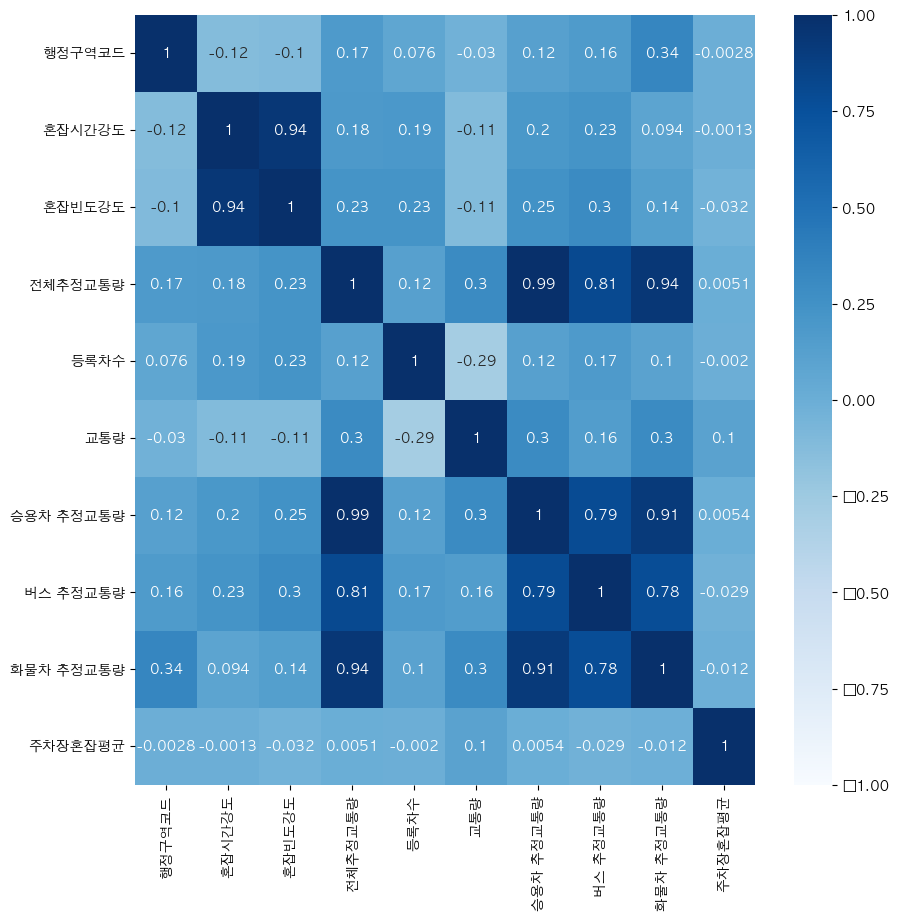

In [201]:
# heatmap으로 상관관계를 표시
import seaborn as sb
plt.rcParams["figure.figsize"] = (10,10)
sb.heatmap(data1.corr(),
           annot = True, 
           cmap = 'Blues', 
           vmin = -1, vmax=1 , 
          )

In [202]:
import statsmodels.formula.api as smf

# 데이터프레임에서 필요한 열만 추출
selected_columns = ['전체추정교통량', '혼잡시간강도', '교통량']
df_selected = data1[selected_columns]

# formula 생성
formula = '전체추정교통량 ~ 혼잡시간강도 + 혼잡빈도강도 + 교통량'

# OLS 모델 적합
result = smf.ols(formula, data=df_selected).fit()

# 결과 출력
result.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                전체추정교통량   R-squared:                       0.169
Model:                            OLS   Adj. R-squared:                  0.163
Method:                 Least Squares   F-statistic:                     28.33
Date:                Sun, 03 Dec 2023   Prob (F-statistic):           1.07e-16
Time:                        19:53:00   Log-Likelihood:                -4368.9
No. Observations:                 422   AIC:                             8746.
Df Residuals:                     418   BIC:                             8762.
Df Model:                           3                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept   1.743e+04   3106.869      5.610      0.000    1.13e+04    2.35e+04
혼잡시간강도      -145.7656     79.725     -1.828      0.068    -302.478      10.947
혼잡빈도강도       217.2612     57.542      3.776      0.000     104.154     330.368
교통량          685.7436     92.695      7.398      0.000     503.538     867.950
==============================================================================
Omnibus:                       25.527   Durbin-Watson:                   1.450
Prob(Omnibus):                  0.000   Jarque-Bera (JB):               29.648
Skew:                           0.559   Prob(JB):                     3.65e-07
Kurtosis:                       3.660   Cond. No.                         734.
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

In [200]:
import pandas as pd
import statsmodels.api as sm
import matplotlib.pyplot as plt

print(data1.head(5))
print(data1.info())

##후진 소거법
variables = df.columns[:-2].tolist()

y = df['Survival_Time']
selected_variables = variables
sl_remove = 0.05

sv_per_step = []
adjusted_r_squared = []
steps = []
step = 0    
while len(selected_variables) > 0:
    X = sm.add_constant(df[selected_variables])
    p_vals = sm.OLS(y,X).fit().pvalues[1:]
    max_pval = p_vals.max()
    if max_pval >= sl_remove:
        remove_variable = p_vals.idxmax()
        selected_variables.remove(remove_variable)
        
        step += 1
        steps.append(step)
        adj_r_squared = sm.OLS(y, sm.add_constant(df[selected_variables])).fit().rsquared_adj
        adjusted_r_squared.append(adj_r_squared)
        sv_per_step.append(selected_variables.copy())
    else:
        break
    
print(selected_variables)


FileNotFoundError: [Errno 2] No such file or directory: 'surgical_unit.csv'